
# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint


## Learning Objectives

At the end of the experiment, you will be able to:

*  find groups or clusters using Hierarchical Clustering Algorithm
*  visualize the clusters using Dendrogram


In [ ]:
#@title Experiment Walkthrough Video
from IPython.display import HTML

HTML("""<video width="800" height="300" controls>
  <source src="https://cdn.talentsprint.com/aiml/AIML_BATCH_HYD_7/3March/hierarchical.mp4" type="video/mp4">
</video>
""")

## Dataset

### Description


1. The dataset contains 60,000 Handwritten digits as training samples and 10,000 Test samples, 
which means each digit occurs 6000 times in the training set and 1000 times in the testing set. 
2. Each image is Size Normalized and Centered 
3. Each image is 28 X 28 Pixel with 0-255 Gray Scale Value. 
4. That means each image is represented as 784 (28 X28) dimension vector where each value is in the range 0- 255.

### History

Yann LeCun (Director of AI Research, Facebook, Courant Institute, NYU) was given the task of identifying the cheque numbers (in the 90’s) and the amount associated with that cheque without manual intervention. That is when this dataset was created which raised the bars and became a benchmark.

Yann LeCun and Corinna Cortes (Google Labs, New York) hold the copyright of MNIST dataset, which is a subset of the original NIST datasets. This dataset is made available under the terms of the Creative Commons Attribution-Share Alike 3.0 license. 

It is the handwritten digits dataset in which half of them are written by the Census Bureau employees and remaining by the high school students. The digits collected among the Census Bureau employees are easier and cleaner to recognize than the digits collected among the students.



### Challenges

Now, if you notice the images below, you will find that between 2 characters there are always certain similarities and differences. Teaching a machine to recognise these patterns and identifying the correct output makes this a good problem to solve in Machine Learning.

![altxt](https://www.researchgate.net/profile/Radu_Tudor_Ionescu/publication/282924675/figure/fig3/AS:319968869666820@1453297931093/A-random-sample-of-6-handwritten-digits-from-the-MNIST-data-set-before-and-after.png)


## Domain Information

Handwriting changes person to person. Some of us have neat handwriting and some have illegible handwriting such as doctors. However, if you think about it even a child who recognizes alphabets and numerics can identify the characters of a text even written by a stranger. But even a technically knowledgeable adult cannot describe the process by which he or she recognizes the text/letters. As you know this is an excellent challenge for Machine Learning.

![altxt](https://i.pinimg.com/originals/f2/7a/ac/f27aac4542c0090872110836d65f4c99.jpg)

## AI/ML Technique

### Hierarchical Clustering

It is an algorithm that builds hierarchy of clusters. This algorithm starts with all the data points assigned to a cluster of their own. Then two nearest clusters are merged into the same cluster. In the end, this algorithm terminates when there is only a single cluster left.

Why Hierarchical Clustering is used over K-means Clustering Algorithm? K-means works well when the shape of clusters are hyper-spherical  (or circular in 2 dimensions). If there are general clusters occurring in the dataset which are non-spherical then probably K-means is not a good choice.

K-means starts with random choice of cluster centers and it may lead to different clustering results and different runs of algorithm is required. Thus, the results may not be repeatable and lack of consistency with hierarchical clustering, you will definitely get the same clustering results.

K-means require prior knowledge of K (number of clusters), whereas in hierarchical clustering we can stop at any level (clusters) we wish.


Hierarchical clustering is of two types:

**Agglomerative**: This is a "bottom up" approach: each observation starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy. 

**Divisive**: This is a "top down" approach: all observations start in one cluster, and splits are performed recursively as one moves down the hierarchy.

In this experiment we will use Agglomerative Clustering.

A dendrogram is a tree like structure that shows the hierarchical relationship between objects. It is most commonly created as an output from hierarchical clustering. The main use of a dendrogram is to work out the best way to allocate objects to clusters.

<img src="https://cdn.talentsprint.com/aiml/Experiment_related_data/IMAGES/Dendogram.png" alt="Drawing" height="500" width="500"/>

The above image represent the dendrogram on MNIST Dataset


Hierarchical clustering gives the deep insight of each step of converging different clusters and create dendrogram which helps you figure out which clusters combination makes sense and where you want to stop.

#### Setup Steps

In [1]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "2100121" #@param {type:"string"}

In [2]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "5142192291" #@param {type:"string"}

In [3]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()
  
notebook= "U2W10_17_hierarchical_Clustering_A" #name of the notebook

def setup(): 
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None
    
    elif getAnswer() and getComplexity() and getAdditional() and getConcepts() and getWalkthrough() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook, "feedback_walkthrough":Walkthrough ,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}

      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:        
        print(r["err"])
        return None   
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://aiml.iiith.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if not Additional: 
      raise NameError
    else:
      return Additional  
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None
  
  
def getWalkthrough():
  try:
    if not Walkthrough:
      raise NameError
    else:
      return Walkthrough
  except NameError:
    print ("Please answer Walkthrough Question")
    return None
  
def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None
  

def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError 
    else: 
      return Answer
  except NameError:
    print ("Please answer Question")
    return None
  

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup() 
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


### Importing the required packages

In [4]:
from time import time
import numpy as np
from scipy import ndimage
from matplotlib import pyplot as plt
from sklearn import manifold, datasets
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

### Load the dataset from sklearn

In [5]:
# Load the mnist digits data from sklearn
digits = datasets.load_digits(n_class=10)
X = digits.data
y = digits.target
n_samples, n_features = X.shape
np.random.seed(0)

Having a larger dataset shows more clearly the behavior of the methods, hence we double the number of samples in the dataset by shifting.

**For example:** Assume a feature vector (1, 2). If you slightly nudge the value to (1.3, 2.2) and create a new point in space, you are merely creating more samples (useful for visualization). We are nudging all the features of X for each data point in X, and adding it back to X to create more data

In [6]:
# Below is the function for nudge images
def nudge_images(X, y):
    # 1. ndimage.shift is the nudge function; 
    # 2. np.random.normal helps with the fractional nudge that you wish (this is input to ndimage.shift). 
    # 3. Finally np.apply_along_axis applies this ndimage.shift function to the entire dataset (through lambda function)
    shift = lambda x: ndimage.shift(x.reshape((8, 8)),
                                  .3 * np.random.normal(size=2),
                                  mode='constant',
                                  ).reshape(-1)
    X = np.concatenate([X, np.apply_along_axis(shift, 1, X)])
    Y = np.concatenate([y, y], axis=0)
    return X, Y


X, y = nudge_images(X, y)

### Visualize the clusters formed 

In [7]:
# Below is the function for plotting the clusters
def plot_clustering(X_red, labels, title=None):
    
    # Calculating the minimum and maximum values, so that we can use it to normalize X_red within min/max range for plotting
    x_min, x_max = np.min(X_red, axis=0), np.max(X_red, axis=0)
    X_red = (X_red - x_min) / (x_max - x_min)

    # Setting the figure size or plot size
    plt.figure(figsize=(6, 4))
    for i in range(X_red.shape[0]):
        # Plotting the text i.e. numbers
        plt.text(X_red[i, 0], X_red[i, 1], str(y[i]),
                 color=plt.cm.seismic(labels[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})
    
    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title, size=17)
    plt.axis('off')
    plt.tight_layout()

### Visualize 2D embedding of the digits dataset

**Note:** Refer to [manifold.SpectralEmbedding](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.SpectralEmbedding.html) 

**Note:** Refer to [AgglomerativeClustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)



In [8]:
print("Computing embedding")                          

X_red =  manifold.SpectralEmbedding(n_components=2).fit_transform(X) # YOUR CODE HERE : Convert the data into 2D embedding and then fit the data 'X'.
        # Hint : You can refer to 'manifold.SpectralEmbedding' from sklearn 
print("Done.")

Computing embedding
Done.


linkage : 0.37s


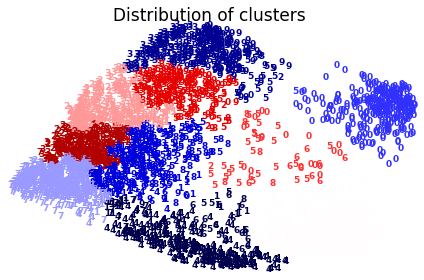

In [10]:
clustering = AgglomerativeClustering(linkage='ward', n_clusters=10) # YOUR CODE HERE : Explore and Create 'AgglomerativeClustering' function from SkLearn

# Starting the timer
t0 = time()

# YOUR CODE HERE: Fit the data ('X_red') into the Agglomerative clustering function defined above
clustering.fit(X_red)


# Printing the time taken
print("%s : %.2fs" % ("linkage", time() - t0))

# YOUR CODE HERE : Plot the cluster distribution using 'plot_clustering' function defined above.
plot_clustering(X_red, clustering.labels_, "Distribution of clusters" )

plt.show()

### Plotting dendrogram 

**Note:** Refer to [scipy.cluster.hierarchy.dendrogram](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html)

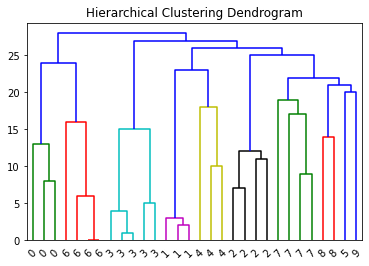

In [11]:
def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


x = X[40:70]         # Intially considering 40:70 samples for visualizing the hierarchy

model = AgglomerativeClustering(linkage='ward') # YOUR CODE HERE : Explore and Create 'AgglomerativeClustering' function from sklearn

model =  model.fit(x) # YOUR CODE HERE: Fit the data ('x') into the model

plt.title('Hierarchical Clustering Dendrogram')

# YOUR CODE HERE : Plot dendrogram using 'plot_dendrogram' function defined above
plot_dendrogram(model, labels=y[40:70])
plt.show()

**Ungraded Excerise:** Examine the image above and answer this question: (No need to change code) If we define the clusters to be the set of points with distance between each other equal to 20, visualise how many number of clusters will be obtained?

### Please answer the questions below to complete the experiment:




In [12]:
#@title State True or False: Agglomerative clustering involves top-down approach?{ run: "auto", form-width: "500px", display-mode: "form" }
Answer= "FALSE" #@param ["","TRUE","FALSE"]


In [13]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good, But Not Challenging for me" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [15]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "non" #@param {type:"string"}


In [16]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]


In [17]:
#@title  Experiment walkthrough video? { run: "auto", vertical-output: true, display-mode: "form" }
Walkthrough = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [18]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [19]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [20]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 8932
Date of submission:  04 Nov 2020
Time of submission:  07:51:38
View your submissions: https://aiml.iiith.talentsprint.com/notebook_submissions
